-  __ECE 657A: Data and Knowledge Modelling and Analysis__
- __Winter 2019__
- __WATIAM:roozara ID: 20801583__
- __Homework 4:Classification I__

Reference used :https://archive.ics.uci.edu/ml/datasets/Bank+Marketing

In [27]:
# Importing the required Python Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler   # Standardize the data for same scale b4 using KNN classification
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier # Imports KNN Classifier
from sklearn.svm import SVC # Imports Support Vector Classifier
from sklearn.metrics import classification_report, confusion_matrix # Imports Classification Report and Confusion Matrix

# Initial Setup for the Jupyter Notebook
from IPython import get_ipython
get_ipython().run_line_magic('matplotlib', 'inline')       # Instead of %matplotlib inline
plt.style.use('ggplot')               # Uses a pre-defined style, which emulates the aesthetics of ggplot popular plotting package in R
sns.set_style('whitegrid')            # whitegrid is a Personal Style Preference

# Load the dataset and store it as a DataFrame.

In [28]:
# Reading the "Bank Marketing" Dataset from "https://archive.ics.uci.edu/ml/datasets/Bank+Marketing" into df
df = pd.read_csv('data/bank-additional.csv', sep=';')
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,30,blue-collar,married,basic.9y,no,yes,no,cellular,may,fri,...,2,999,0,nonexistent,-1.8,92.893,-46.2,1.313,5099.1,no
1,39,services,single,high.school,no,no,no,telephone,may,fri,...,4,999,0,nonexistent,1.1,93.994,-36.4,4.855,5191.0,no
2,25,services,married,high.school,no,yes,no,telephone,jun,wed,...,1,999,0,nonexistent,1.4,94.465,-41.8,4.962,5228.1,no
3,38,services,married,basic.9y,no,unknown,unknown,telephone,jun,fri,...,3,999,0,nonexistent,1.4,94.465,-41.8,4.959,5228.1,no
4,47,admin.,married,university.degree,no,yes,no,cellular,nov,mon,...,1,999,0,nonexistent,-0.1,93.200,-42.0,4.191,5195.8,no


In [29]:
df.shape

(4119, 21)

# Formulate the problem as kNN and SVM (linear) problem and run using standard libraries in your language or choice.

In [30]:
# Change y column to numeric
df['y'] = df['y'].astype('category')
cat_columns = df.select_dtypes(['category']).columns
df[cat_columns] = df[cat_columns].apply(lambda x: x.cat.codes)
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,30,blue-collar,married,basic.9y,no,yes,no,cellular,may,fri,...,2,999,0,nonexistent,-1.8,92.893,-46.2,1.313,5099.1,0
1,39,services,single,high.school,no,no,no,telephone,may,fri,...,4,999,0,nonexistent,1.1,93.994,-36.4,4.855,5191.0,0
2,25,services,married,high.school,no,yes,no,telephone,jun,wed,...,1,999,0,nonexistent,1.4,94.465,-41.8,4.962,5228.1,0
3,38,services,married,basic.9y,no,unknown,unknown,telephone,jun,fri,...,3,999,0,nonexistent,1.4,94.465,-41.8,4.959,5228.1,0
4,47,admin.,married,university.degree,no,yes,no,cellular,nov,mon,...,1,999,0,nonexistent,-0.1,93.200,-42.0,4.191,5195.8,0


In [31]:
# Choose only Numeric columns
df = df.select_dtypes(exclude=['object'])
df.shape

(4119, 11)

# KNN for Classification

Splitting the data into train and test data. The test data size chosen to be 30%.

In [32]:
# Train Test Split for KNN:
X = df.loc[:, df.columns != 'y']
y = df['y']
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.30, random_state=99)

In [33]:
# Using KNN: (Instantiate – Train – Predict)
# We are trying to come up with a model to predict whether someone will be a TARGET CLASS or not. We'll start with k=1.
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train,y_train)
knn_predictions = knn.predict(X_test)

# Evaluation
print(classification_report(y_test,knn_predictions))
print(confusion_matrix(y_test,knn_predictions))

              precision    recall  f1-score   support

           0       0.93      0.93      0.93      1081
           1       0.49      0.50      0.49       155

   micro avg       0.87      0.87      0.87      1236
   macro avg       0.71      0.71      0.71      1236
weighted avg       0.87      0.87      0.87      1236

[[1001   80]
 [  78   77]]


Improving the model by choosing a better k value. A plot has to be constructed (elbow method plot) for the error rate Vs. K Value (range from 1 to 40)

WITH K=1


[[1001   80]
 [  78   77]]


              precision    recall  f1-score   support

           0       0.93      0.93      0.93      1081
           1       0.49      0.50      0.49       155

   micro avg       0.87      0.87      0.87      1236
   macro avg       0.71      0.71      0.71      1236
weighted avg       0.87      0.87      0.87      1236

WITH K=18


[[1051   30]
 [  90   65]]


              precision    recall  f1-score   support

           0       0.92      0.97      0.95      1081
           1       0.68      0.42      0.52       155

   micro avg       0.90      0.90      0.90      1236
   macro avg       0.80      0.70      0.73      1236
weighted avg       0.89      0.90      0.89      1236



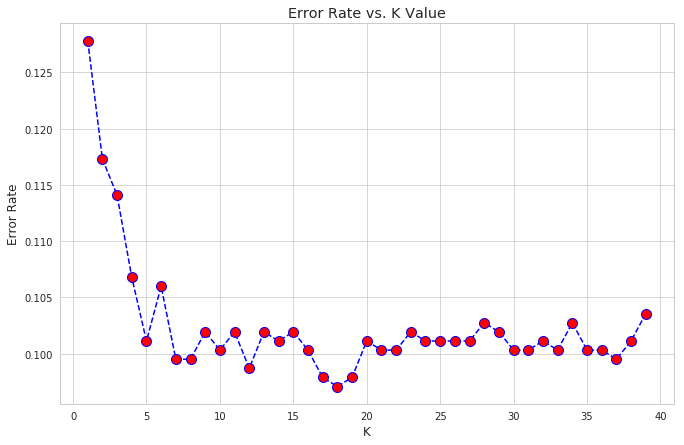

In [34]:
# Use the elbow method to pick the best K Value:
error_rate = [] # Define Error Rate as empty list
for i in range(1,40):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    pred_i = knn.predict(X_test)
    error_rate.append(np.mean(pred_i != y_test)) # Average Error Rate

plt.figure(figsize=(11,7)) # Plot the K Value' (X-axis) (1-40) vs. 'Error Rate (Y-axis)
plt.plot(range(1,40), error_rate, color='blue', linestyle='dashed', marker='o', markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')

knn = KNeighborsClassifier(n_neighbors=1) # FIRST A QUICK COMPARISON TO OUR ORIGINAL K=1
knn.fit(X_train,y_train)
knn_predictions = knn.predict(X_test)
print('WITH K=1')
print('\n')
print(confusion_matrix(y_test,knn_predictions))
print('\n')
print(classification_report(y_test,knn_predictions))

knn = KNeighborsClassifier(n_neighbors=18) # NOW WITH K=18
knn.fit(X_train,y_train)
knn_predictions = knn.predict(X_test)
print('WITH K=18')
print('\n')
print(confusion_matrix(y_test,knn_predictions))
print('\n') 
print(classification_report(y_test,knn_predictions)) # We were able to squeeze some more performance out of our model by tuning to a better K value!

we can see with better K values the f measure improved. An f1 score of 0.49 when k = 1 and an improved f1  score of 0.52 when k = 18 using the elbow method 

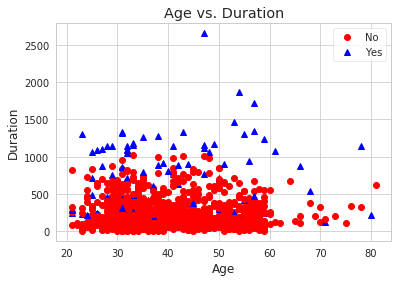

In [35]:
plt.xlabel('Age')
plt.ylabel('Duration')
plt.title('Age vs. Duration')

# Iterating on all test samples. range changes index from 0 to (number of test samples-1)
for index in range(X_test.shape[0]):   
    if knn_predictions.ravel()[index] == 0:
        plt0, = plt.plot(X_test.iloc[index, 0], X_test.iloc[index, 1], 'ro', label='No') # Class 0
    else:
        plt1, = plt.plot(X_test.iloc[index, 0], X_test.iloc[index, 1], '^b', label='Yes') # Class 1
plt.legend(handles = [plt0, plt1])

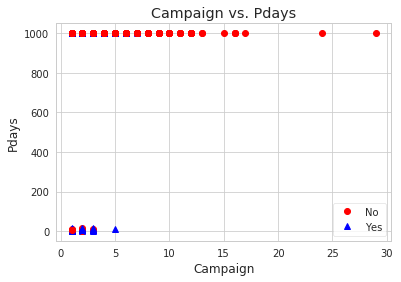

In [36]:
plt.xlabel('Campaign')
plt.ylabel('Pdays')
plt.title('Campaign vs. Pdays')

# Iterating on all test samples. range changes index from 0 to (number of test samples-1)
for index in range(X_test.shape[0]):   
    if knn_predictions.ravel()[index] == 0:
        plt0, = plt.plot(X_test.iloc[index, 2], X_test.iloc[index, 3], 'ro', label='No') # Class 0
    else:
        plt1, = plt.plot(X_test.iloc[index, 2], X_test.iloc[index, 3], '^b', label='Yes') # Class 1
plt.legend(handles = [plt0, plt1])

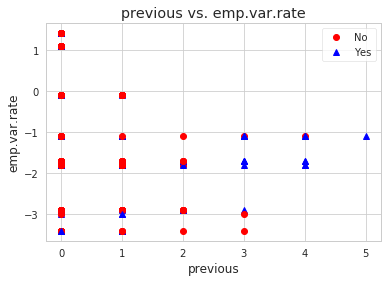

In [37]:
plt.xlabel('previous')
plt.ylabel('emp.var.rate')
plt.title('previous vs. emp.var.rate')

# Iterating on all test samples. range changes index from 0 to (number of test samples-1)
for index in range(X_test.shape[0]):   
    if knn_predictions.ravel()[index] == 0:
        plt0, = plt.plot(X_test.iloc[index, 4], X_test.iloc[index, 5], 'ro', label='No') # Class 0
    else:
        plt1, = plt.plot(X_test.iloc[index, 4], X_test.iloc[index, 5], '^b', label='Yes') # Class 1
plt.legend(handles = [plt0, plt1])

# SVM for Classification

In [38]:
# Train Test Split for SVM:
X = df.drop('y',axis=1) # All columns except y
y = df['y']
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.30, random_state=99)

# SVM
model = SVC(kernel='linear')
model.fit(X_train,y_train)

# Predictions and Evaluations using default values
SVM_predictions = model.predict(X_test)
print(confusion_matrix(y_test,SVM_predictions))
print(classification_report(y_test,SVM_predictions))

[[1060   21]
 [ 100   55]]
              precision    recall  f1-score   support

           0       0.91      0.98      0.95      1081
           1       0.72      0.35      0.48       155

   micro avg       0.90      0.90      0.90      1236
   macro avg       0.82      0.67      0.71      1236
weighted avg       0.89      0.90      0.89      1236



SVM records an f1-score of 0.48

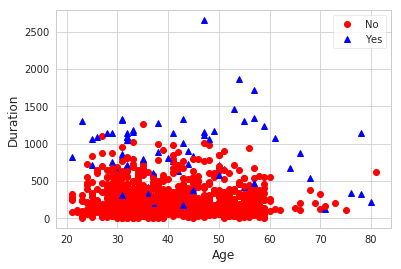

In [39]:
plt.xlabel('Age')
plt.ylabel('Duration')

# Iterating on all test samples. range changes index from 0 to (number of test samples-1)
for index in range(X_test.shape[0]):   
    if SVM_predictions.ravel()[index] == 0:
        plt0, = plt.plot(X_test.iloc[index, 0], X_test.iloc[index, 1], 'ro', label='No') # Class 0
    else:
        plt1, = plt.plot(X_test.iloc[index, 0], X_test.iloc[index, 1], '^b', label='Yes') # Class 1
plt.legend(handles = [plt0, plt1])

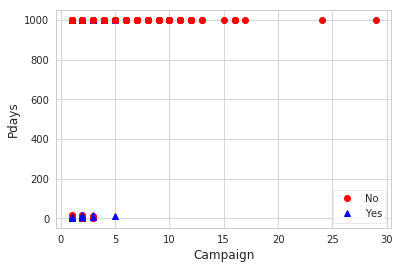

In [40]:
plt.xlabel('Campaign')
plt.ylabel('Pdays')

# Iterating on all test samples. range changes index from 0 to (number of test samples-1)
for index in range(X_test.shape[0]):   
    if SVM_predictions.ravel()[index] == 0:
        plt0, = plt.plot(X_test.iloc[index, 2], X_test.iloc[index, 3], 'ro', label='No') # Class 0
    else:
        plt1, = plt.plot(X_test.iloc[index, 2], X_test.iloc[index, 3], '^b', label='Yes') # Class 1
plt.legend(handles = [plt0, plt1])

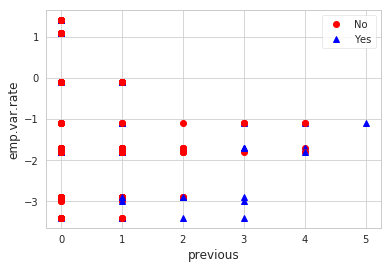

In [41]:
plt.xlabel('previous')
plt.ylabel('emp.var.rate')

# Iterating on all test samples. range changes index from 0 to (number of test samples-1)
for index in range(X_test.shape[0]):   
    if SVM_predictions.ravel()[index] == 0:
        plt0, = plt.plot(X_test.iloc[index, 4], X_test.iloc[index, 5], 'ro', label='No') # Class 0
    else:
        plt1, = plt.plot(X_test.iloc[index, 4], X_test.iloc[index, 5], '^b', label='Yes') # Class 1
plt.legend(handles = [plt0, plt1])

- We cannot see a clear separation in three plots, each is between two features
- Two features out of 20 are not enough to separate two classes
- There may be a combination of more than two features that have a better separation between classes
- I think, the plot of Age vs. Duration is the most clear separation between the classes in my three plots
- As we can see the plots of the KNN and SVM are similar, probably due to both working based on distance